In [1]:
import pandas as pd

# **TEMA 1 TRATAMIENTO DE VARIABLES E INGENIERÍA DE CARACTERÍSTICAS**

Industria de Telecomunicaciones: Venta de productos de telefonía celular 

*   Importancia 

> ¿Cuál es el desempeño de mis vendedores considerando sus ingresos por ventas y algunas otras variables? 

> Procesos: _____________________________________________________________________


> Finanzas: _____________________________________________________________________

> Marketing:_____________________________________________________________________

*   10 vendedores
*   34 productos distintos
*   9 meses de registro

* **Datos del ejercicio**

> Tiempo completo: Vendedor de tiempo completo o no. 

> Id_personal: Clave de única para cada vendedor

> mes: Mes en el que se hicieron las ventas (Enero - Julio 2021)

> mes_id: Mes en el que se hicieron las ventas (1: Enero, 2: Febrero, 3: Marzo, etc.)

> sku_id: Idenetificador de productos

> ventas_totales: Ventas de cada vendedor, de cada producto, en cada mes de registro (2020).

> ingresos año pasado: Ingresos de los vendedores (2021)

> Calificación servicio: Regular / Excelente / Malo

> Comentarios adicionales: Comentarios con respecto al desempeño de los vendedores y el trato con los clientes. 

> Fecha de Contratación: Fecha en la que contrataron al vendedor. 


**Ajuste: Vamos a considerar que los datos son de 2021, por lo tanto, eliminar los renglones equivalentes al mes 8 y 9 para aterrizarlo a un contexto más actual, por lo tanto, la columna de ingresos, corresponde a los ingresos del año actual.**




In [35]:
# Lectura de datos
datos2 = pd.read_csv("Data/datos_tema2.csv")
datos2.head()

,tiempo_completo,id_personal,mes,mes_id,sku_id,ventas_totales,ingresos_anio_pasado,calificacion_servicio,comentarios_adicionales,fecha_contratacion
0,si,1,enero,1,1,18,28800,Regular,lento servicial amigable,27/06/2012
1,si,1,febrero,2,1,6,9600,Excelente,servicial,27/06/2012
2,si,1,marzo,3,1,16,25600,Excelente,atento,27/06/2012
3,si,1,abril,4,1,1,1600,Excelente,amable servicial,27/06/2012
4,si,1,mayo,5,1,6,9600,Excelente,servicial,27/06/2012


In [36]:
#Analizar los primeros 7 meses del año
datos2 = datos2[(datos2['mes_id'] < 8)]
datos2.shape

(2380, 10)

In [37]:
#datos numéricos - vamos a enfocarnos en ingresos
# ¿qué pueden ver con los ingresos? ¿Ingresos negativos? ¿Mediana: 16,000 y valor máximo de 1,440,000? 
# valores atípicos
pd.options.display.float_format= '{:0.2f}'.format
datos2.describe()

,id_personal,mes_id,sku_id,ventas_totales,ingresos_anio_pasado
count,2380.00,2380.00,2380.00,2380.00,2380.00
mean,5.50,4.00,17.50,10.05,17077.23
std,2.87,2.00,9.81,6.08,36337.06
min,1.00,1.00,1.00,0.00,-1000.00
25%,3.00,2.00,9.00,5.00,8000.00
50%,5.50,4.00,17.50,10.00,16000.00
75%,8.00,6.00,26.00,15.00,24000.00
max,10.00,7.00,34.00,50.00,1440000.00


## Valores atípicos

<AxesSubplot:>

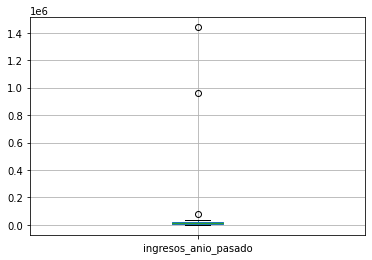

In [38]:
# construir un boxplot dataframe.boxplot(colum=['columna a graficar'])
boxplot = datos2.boxplot(column=['ingresos_anio_pasado'])
boxplot

In [40]:
# DESVIACIÓN ESTÁNDAR
#Detección con desviación estándar (Distancia de observación a la media > X*Desviación Estándar -> Valor atípico)
#If a value has a distance to the average higher than x * standard deviation, it can be assumed as an outlier. Then what x should be?
#There is no trivial solution for x, but usually, a value between 2 and 4 seems practical.

factor = 3 #probar con 2 y 3
upper_lim = datos2['ingresos_anio_pasado'].mean() + datos2['ingresos_anio_pasado'].std()*factor
print(upper_lim)
lower_lim = datos2['ingresos_anio_pasado'].mean() - datos2['ingresos_anio_pasado'].std()*factor
print(lower_lim)

# Valores que están fuera de estos límites

datos2[(datos2['ingresos_anio_pasado'] > upper_lim) | (datos2['ingresos_anio_pasado'] < lower_lim)]


126088.4186128516
-91933.964831339


,tiempo_completo,id_personal,mes,mes_id,sku_id,ventas_totales,ingresos_anio_pasado,calificacion_servicio,comentarios_adicionales,fecha_contratacion
40,si,1,mayo,5,5,6,960000,Excelente,amable servicial,27/06/2012
192,si,1,abril,4,22,9,1440000,Excelente,amable servicial,27/06/2012


In [41]:
# Opción 1: Eliminarlos considerando Desviación estándar
data2_1 = datos2[(datos2['ingresos_anio_pasado'] < upper_lim) & (datos2['ingresos_anio_pasado'] > lower_lim)]
data2_1.shape

(2378, 10)

<AxesSubplot:>

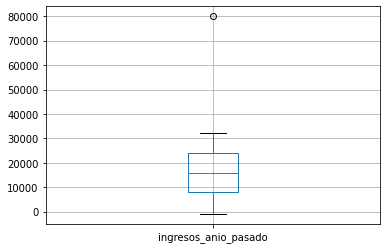

In [42]:
boxplot = data2_1.boxplot(column=['ingresos_anio_pasado'])
boxplot

In [44]:
# PERCENTILES
# Igual que en el caso anterior, pero considerando percentiles y eliminarlos

# Opción 2: Eliminarlos considerando percentiles 
upper_lim = datos2['ingresos_anio_pasado'].quantile(.95)
print(upper_lim)
lower_lim = datos2['ingresos_anio_pasado'].quantile(.05)
print(lower_lim)

datos2[(datos2['ingresos_anio_pasado'] > upper_lim) | (datos2['ingresos_anio_pasado'] < lower_lim)].shape #eliminar 290

data2_2 = datos2[(datos2['ingresos_anio_pasado'] < upper_lim) & (datos2['ingresos_anio_pasado'] > lower_lim)]
data2_2.shape

30400.0
1600.0


(1942, 10)

<AxesSubplot:>

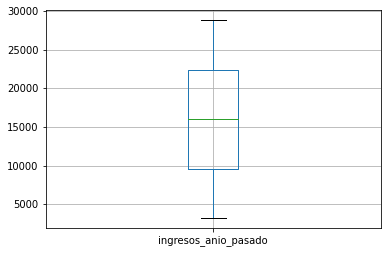

In [45]:
boxplot = data2_2.boxplot(column=['ingresos_anio_pasado'])
boxplot

In [46]:
data2_2.describe()

,id_personal,mes_id,sku_id,ventas_totales,ingresos_anio_pasado
count,1942.00,1942.00,1942.00,1942.00,1942.00
mean,5.49,3.99,17.65,9.98,15971.99
std,2.88,2.01,9.79,4.92,7866.20
min,1.00,1.00,1.00,2.00,3200.00
25%,3.00,2.00,9.00,6.00,9600.00
50%,5.00,4.00,18.00,10.00,16000.00
75%,8.00,6.00,26.00,14.00,22400.00
max,10.00,7.00,34.00,18.00,28800.00


In [47]:
# PROCESO ARTESANAL

# Opción 3: Invetsiga la causa raíz - regresamos

datos2.describe() # consideramos la media: 17,077, mediana: 16,000 y el percentil 75: 24,00


,id_personal,mes_id,sku_id,ventas_totales,ingresos_anio_pasado
count,2380.00,2380.00,2380.00,2380.00,2380.00
mean,5.50,4.00,17.50,10.05,17077.23
std,2.87,2.00,9.81,6.08,36337.06
min,1.00,1.00,1.00,0.00,-1000.00
25%,3.00,2.00,9.00,5.00,8000.00
50%,5.50,4.00,17.50,10.00,16000.00
75%,8.00,6.00,26.00,15.00,24000.00
max,10.00,7.00,34.00,50.00,1440000.00


In [49]:
datos2[(datos2['ingresos_anio_pasado'] > 35000 )] #probar con 30 y 40 mil, vamos con nóminas, ¿cómo se determina el pago? ventas*2000*0.80, a alguien se le fueron 0 demás (max unidades vendidas 18)


,tiempo_completo,id_personal,mes,mes_id,sku_id,ventas_totales,ingresos_anio_pasado,calificacion_servicio,comentarios_adicionales,fecha_contratacion
40,si,1,mayo,5,5,6,960000,Excelente,amable servicial,27/06/2012
192,si,1,abril,4,22,9,1440000,Excelente,amable servicial,27/06/2012
240,si,1,julio,7,27,50,80000,Excelente,servicial,27/06/2012


In [14]:
#6*2000*0.80
#9*2000*0.80
#50*2000*0.80 #efectivamente ganó 80 mil 

In [39]:
datos2.iloc[40,6] = 9600
datos2.iloc[40,:]

tiempo_completo                          si
id_personal                               1
mes                                    mayo
mes_id                                    5
sku_id                                    5
ventas_totales                            6
ingresos_anio_pasado                   9600
calificacion_servicio             Excelente
comentarios_adicionales    amable servicial
fecha_contratacion               27/06/2012
Name: 40, dtype: object

In [37]:
datos2.iloc[192,6] = 14400

In [40]:
# El 80 podemos seguir con el, si es un valor veridico. 

## **TEMA 2: FAMILIARIZACIÓN Y LIMPIEZA DE DATOS**


Industria de Telecomunicaciones: Venta de productos de telefonía celular 
*   Importancia 


> ¿Cómo impactan mis ventas en las diferentes áreas? :

> Procesos: _____________________________________________________________________


> Finanzas: _____________________________________________________________________

> Marketing:_____________________________________________________________________

*   10 puntos de venta
*   34 productos distintos
*   9 meses de registro

* **Datos del ejercicio**

> pdv_id: Punto de venta (id tienda)

> mes: Mes en el que se hicieron las ventas

> mes_id: Mes en el que se hicieron las ventas (1: Enero, 2: Febrero, 3: Marzo, etc.)

> sku_id: Idenetificador de productos

> ventas_totales: Ventas en cada punto de venta, de cada producto, en cada mes de registro.

> ventas_totales_en_tienda_de_cada_mes: Ventas totales que tuvo la tienda en cada mes de registro. 

> ventas_totales_1_mes_pasado_ Ventas que tuvo la tienda, de cada producto, el mes pasado.

> promedio_ventas_totales_por_sku_en_cada_mes: En promedio cuantas unidades de cada producto estoy vendido por mes


## Valores perdidos

In [2]:
# Lectura de Datos 
datos = pd.read_csv("Data/datos_tema1.csv")
datos.head()

,pdv_id,mes,mes_id,sku_id,ventas_totales,ventas_totales_en_tienda_de_cada_mes,ventas_totales_1_mes_pasado,promedio_ventas_totales_por_sku_en_cada_mes
0,1,enero,1.0,1,2,23.0,2.0,NaN
1,1,NaN,2.0,1,0,27.0,2.0,NaN
2,1,marzo,3.0,1,1,28.0,0.0,NaN
3,1,abril,4.0,1,0,31.0,1.0,NaN
4,1,mayo,NaN,1,0,37.0,0.0,NaN


In [42]:
datos.shape

(3060, 8)

**¿Cómo detectar Nan?**

In [43]:
#pd.isnull() dentro del paréntesis el nombre del dataframe
pd.isnull(datos)


,pdv_id,mes,mes_id,sku_id,ventas_totales,ventas_totales_en_tienda_de_cada_mes,ventas_totales_1_mes_pasado,promedio_ventas_totales_por_sku_en_cada_mes
0,False,False,False,False,False,False,False,True
1,False,True,False,False,False,False,False,True
2,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...
3055,False,False,False,False,False,False,False,True
3056,False,False,False,False,False,False,False,True
3057,False,False,False,False,False,False,False,True
3058,False,False,False,False,False,False,False,True


In [3]:
# Para saber el total, al comando anterior le agregamos .sum()
pd.isna(datos).sum()

pdv_id                                            0
mes                                             340
mes_id                                           37
sku_id                                            0
ventas_totales                                    0
ventas_totales_en_tienda_de_cada_mes             31
ventas_totales_1_mes_pasado                       2
promedio_ventas_totales_por_sku_en_cada_mes    3060
dtype: int64

In [4]:
# Por el momento, vamos a eliminar la última columna con el comando dataframe.drop(['columna'], axis=1), no olvidar guardar los cambios
#datos_tema1 = datos.drop(['promedio_ventas_totales_por_sku_en_cada_mes'], axis = 1) #añadir columns 

datos_tema1 = datos.drop(['promedio_ventas_totales_por_sku_en_cada_mes'], axis = 1)

In [14]:
# Si quisiera ver los renglones que tienen NaN puedo utilizar el siguiente código 
pd.set_option('display.max_rows', 500) #cuantos renglones se pueden mostrar
true_false = datos_tema1.isnull() #datos con valores nulos - igual que la primera visualización
renglones_true = true_false.any(axis=1) #etiqueta los valores renglones que tienen valores nulos, donde encontremos un True, pon True
datos_tema1[renglones_true].head() #410 renglones #filtro

,pdv_id,mes,mes_id,sku_id,ventas_totales,ventas_totales_en_tienda_de_cada_mes,ventas_totales_1_mes_pasado
1,1,NaN,2.0,1,0,27.0,2.0
4,1,mayo,NaN,1,0,37.0,0.0
9,1,enero,1.0,2,5,23.0,NaN
10,1,NaN,2.0,2,0,27.0,5.0
13,1,mayo,NaN,2,3,37.0,4.0


**¿Qué podemos hacer?**


> Opción 0: Eliminar


> Opción 1: Imputar valores



In [8]:
# Opción 0: Quitar renglones que tienen NA dataframe.dropna(axis=0), axis = 0:filas, 1:columnas
na_1 = datos_tema1.dropna(axis=0)
na_1.shape

(2650, 7)

In [10]:
na_2 = datos_tema1.dropna(axis=1)
na_2.shape

(3060, 3)

In [16]:
# Eliminar renglones de una columna en particular, solamente tiene 2 valores vacíos, entonces quitamos esos renglones nada más. 
# dataframe.dropna(subset = [variable], axis = 0)
#datos_tema1 =  datos_tema1.dropna(subset = ['ventas_totales_1_mes_pasado'], axis = 0 )
#pd.isna(datos_tema1).sum()

pdv_id                                    0
mes                                     340
mes_id                                   37
sku_id                                    0
ventas_totales                            0
ventas_totales_en_tienda_de_cada_mes     31
ventas_totales_1_mes_pasado               0
dtype: int64

In [17]:
# Opción 1: En la segunda columna (mes), todos los NaN corresponden al mes con id = 2,  "Febrero"
# Imputar valor categórico / string, dataframe['columna'].fillna('valor a imputar', inplace = True)
datos_tema1['mes'].fillna('febrero', inplace = True)

In [18]:
# verificamos que no haya nulos en mes
pd.isna(datos_tema1).sum()

pdv_id                                   0
mes                                      0
mes_id                                  37
sku_id                                   0
ventas_totales                           0
ventas_totales_en_tienda_de_cada_mes    31
ventas_totales_1_mes_pasado              0
dtype: int64

In [20]:
# Opción 1: En la columna 3 (mes_id), todos los Nan corresponden al mes de mayo (5)
# Imputar valores numéricos dataframe['columna'].fillna(valor a imputar, inplace = True)
datos_tema1['mes_id'].fillna(5, inplace = True)
pd.isna(datos_tema1).sum()

pdv_id                                   0
mes                                      0
mes_id                                   0
sku_id                                   0
ventas_totales                           0
ventas_totales_en_tienda_de_cada_mes    31
ventas_totales_1_mes_pasado              0
dtype: int64

In [22]:
datos_tema1.head(50)

,pdv_id,mes,mes_id,sku_id,ventas_totales,ventas_totales_en_tienda_de_cada_mes,ventas_totales_1_mes_pasado
0,1,enero,1.0,1,2,23.0,2.0
1,1,febrero,2.0,1,0,27.0,2.0
2,1,marzo,3.0,1,1,28.0,0.0
3,1,abril,4.0,1,0,31.0,1.0
4,1,mayo,5.0,1,0,37.0,0.0
5,1,junio,6.0,1,0,12.0,0.0
6,1,julio,7.0,1,0,38.0,0.0
7,1,agosto,8.0,1,0,43.0,0.0
8,1,septiembre,9.0,1,0,32.0,0.0
10,1,febrero,2.0,2,0,27.0,5.0


In [26]:
# Opción 1: Columna 6 (ventas totales en la tienda en cada mes)

# Primero vamos a ver de nuevo los registros, todos los valores que hacen falta corresponden a las ventas que se hicieron en el punto de venta 1, en el mes de enero
#pd.set_option('display.max_rows', 500)
true_false = datos_tema1.isnull()
renglones_true = true_false.any(axis=1)
datos_tema1[renglones_true] 


,pdv_id,mes,mes_id,sku_id,ventas_totales,ventas_totales_en_tienda_de_cada_mes,ventas_totales_1_mes_pasado
27,1,enero,1.0,4,2,NaN,2.0
36,1,enero,1.0,5,2,NaN,2.0
45,1,enero,1.0,6,3,NaN,3.0
54,1,enero,1.0,7,2,NaN,2.0
63,1,enero,1.0,8,1,NaN,1.0
72,1,enero,1.0,9,1,NaN,1.0
81,1,enero,1.0,10,1,NaN,1.0
90,1,enero,1.0,11,0,NaN,0.0
99,1,enero,1.0,12,0,NaN,0.0
108,1,enero,1.0,13,0,NaN,0.0


In [27]:
# Vamos a calcular cuantas ventas hubo por punto de venta y mes, dataframe['columna para guardar calculos'] = dataframe.groupby(['variable', 'variable2', 'mes_id']).variable_de_interes.transform('sum'), también puede ser mean

datos_tema1['ventas_totales_en_tienda_de_cada_mes'] =datos_tema1.groupby(['pdv_id','mes', 'mes_id']).ventas_totales.transform('sum')

#datos_tema1.loc[datos_tema1['mes'] == 'enero']


In [28]:
datos_tema1.loc[datos_tema1['mes'] == 'enero']

,pdv_id,mes,mes_id,sku_id,ventas_totales,ventas_totales_en_tienda_de_cada_mes,ventas_totales_1_mes_pasado
0,1,enero,1.0,1,2,14,2.0
27,1,enero,1.0,4,2,14,2.0
36,1,enero,1.0,5,2,14,2.0
45,1,enero,1.0,6,3,14,3.0
54,1,enero,1.0,7,2,14,2.0
63,1,enero,1.0,8,1,14,1.0
72,1,enero,1.0,9,1,14,1.0
81,1,enero,1.0,10,1,14,1.0
90,1,enero,1.0,11,0,14,0.0
99,1,enero,1.0,12,0,14,0.0


In [30]:
# verificamos valores nulos
pd.isnull(datos_tema1).sum()

pdv_id                                  0
mes                                     0
mes_id                                  0
sku_id                                  0
ventas_totales                          0
ventas_totales_en_tienda_de_cada_mes    0
ventas_totales_1_mes_pasado             0
dtype: int64

In [31]:
true_false = datos_tema1.isnull()
renglones_true = true_false.any(axis=1)
datos_tema1[renglones_true] 

# ¿Qué vamos a hacer?
# Con la tabla de desliegue de datos_tema1  anterior podemos ver que podría ser 2 el valor a imputar
# Pero podríamos indagar más, preguntar a los encargados, pedir más información a los departamentos

,pdv_id,mes,mes_id,sku_id,ventas_totales,ventas_totales_en_tienda_de_cada_mes,ventas_totales_1_mes_pasado


In [32]:
# Opción 1: Nan con 2
#datos_tema1['ventas_totales_1_mes_pasado'].fillna(2, inplace=True)


# Opción 1: Nan con mediana de la columna 
datos_tema1 = datos_tema1.fillna(datos_tema1.median())


# Opción 1: Nan en variable categorica - con moda
#datos_tema1['mes'].fillna(datos_tema1['mes'].value_counts().idxmax(), inplace=True)

/tmp/ipykernel_176/856057262.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  datos_tema1 = datos_tema1.fillna(datos_tema1.median())


In [33]:
datos_tema1.describe()

,pdv_id,mes_id,sku_id,ventas_totales,ventas_totales_en_tienda_de_cada_mes,ventas_totales_1_mes_pasado
count,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000
mean,5.502943,5.002616,17.509810,0.261609,8.885546,0.251145
std,2.871383,2.581227,9.808007,0.854229,9.427615,0.831409
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,9.000000,0.000000,2.000000,0.000000
50%,6.000000,5.000000,18.000000,0.000000,7.000000,0.000000
75%,8.000000,7.000000,26.000000,0.000000,12.000000,0.000000
max,10.000000,9.000000,34.000000,12.000000,43.000000,12.000000


# TEMA 3: Reducción de Dimensionalidad e Ingeniería de Características

## **Análisis de Componentes Principales - Código**

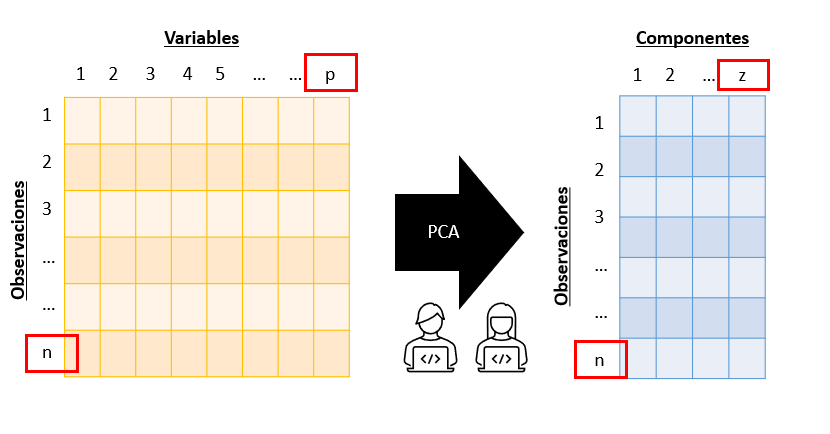

In [51]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [52]:
iris = sm.datasets.get_rdataset("iris", "datasets")
datos = iris.data

In [53]:
iris

<class 'statsmodels.datasets.utils.Dataset'>

In [54]:
datos.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa


In [55]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [56]:
print('Media de cada variable')
datos.mean()

Media de cada variable


Sepal.Length   5.84
Sepal.Width    3.06
Petal.Length   3.76
Petal.Width    1.20
dtype: float64

In [57]:
print('Desviación estándar de cada variable')
datos.std()

Desviación estándar de cada variable


Sepal.Length   0.83
Sepal.Width    0.44
Petal.Length   1.77
Petal.Width    0.76
dtype: float64

In [58]:
datos.var()

Sepal.Length   0.69
Sepal.Width    0.19
Petal.Length   3.12
Petal.Width    0.58
dtype: float64

In [59]:
escalar = StandardScaler()

In [60]:
#para iris
features = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
# Separating out the features
x = datos.loc[:, features]
# Separating out the target
y = datos.loc[:,['Species']]

In [61]:
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.10,3.50,1.40,0.20
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20


In [62]:
y.head()

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [63]:
#datos_escalados = escalar.fit(datos)
#datos_escalados = escalar.transform(datos)
datos_escalados = escalar.fit(x)
datos_escalados = escalar.transform(x)
datos_escalados

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [70]:
pca_model = PCA(n_components = 4)

In [71]:
pca_model.fit(datos_escalados)

PCA(n_components=4)

In [72]:
pca_model.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [75]:
# Se combierte el array a dataframe para añadir nombres a los ejes. #vector de loadings, cargas
pd.DataFrame(
    data    = pca_model.components_,
    columns = x.columns,
    index   = ['PC1', 'PC2', 'PC3','PC4']
)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
PC1,0.52,-0.27,0.58,0.56
PC2,0.38,0.92,0.02,0.07
PC3,-0.72,0.24,0.14,0.63
PC4,-0.26,0.12,0.80,-0.52


In [76]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca_model.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.72962445 0.95813207 0.99482129 1.        ]


In [77]:
#proyecciones = np.dot(pca_model.components_, scale(datos).T)
#proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4'])
#proyecciones = proyecciones.transpose().set_index(datos.index)
#proyecciones

proyecciones = np.dot(pca_model.components_, scale(x).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3','PC4'])
proyecciones = proyecciones.transpose().set_index(x.index)
proyecciones

,PC1,PC2,PC3,PC4
0,-2.26,0.48,-0.13,-0.02
1,-2.08,-0.67,-0.23,-0.10
2,-2.36,-0.34,0.04,-0.03
3,-2.30,-0.60,0.09,0.07
4,-2.39,0.65,0.02,0.04
5,-2.08,1.49,0.03,-0.01
6,-2.44,0.05,0.34,0.04
7,-2.23,0.22,-0.09,0.02
8,-2.33,-1.12,0.15,0.03
9,-2.18,-0.47,-0.25,0.04


In [84]:
conjunto_1 = proyecciones[["PC1","PC2"]]
conjunto_1.head()

,PC1,PC2
0,-2.26,0.48
1,-2.08,-0.67
2,-2.36,-0.34
3,-2.30,-0.60
4,-2.39,0.65


In [85]:
conjunto_2 = proyecciones[["PC1","PC2","PC3"]]
conjunto_2.head()

,PC1,PC2,PC3
0,-2.26,0.48,-0.13
1,-2.08,-0.67,-0.23
2,-2.36,-0.34,0.04
3,-2.30,-0.60,0.09
4,-2.39,0.65,0.02


In [86]:
conjunto_2 = pd.concat([conjunto_2, datos[['Species']]], axis = 1)
conjunto_2

,PC1,PC2,PC3,Species
0,-2.26,0.48,-0.13,setosa
1,-2.08,-0.67,-0.23,setosa
2,-2.36,-0.34,0.04,setosa
3,-2.30,-0.60,0.09,setosa
4,-2.39,0.65,0.02,setosa
5,-2.08,1.49,0.03,setosa
6,-2.44,0.05,0.34,setosa
7,-2.23,0.22,-0.09,setosa
8,-2.33,-1.12,0.15,setosa
9,-2.18,-0.47,-0.25,setosa


In [90]:
conjunto_1.to_csv('conjunto_1.csv')
!cp conjunto_1.csv "data/"

In [92]:
conjunto_2.to_csv('conjunto_2.csv')
!cp conjunto_2.csv "data/"